 question-Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years

import the libraries



In [4]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

reading the file

In [6]:
data=pd.read_csv("50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


EDA 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
data.shape

(50, 5)

In [13]:
data.size

250

In [15]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

renaming the independent variables

In [22]:
data=data.rename({'R&D Spend':'RDS','Marketing Spend':'MS'},axis=1)
data

,RDS,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


Correlation Matrix


In [23]:
data.corr()

,RDS,Administration,MS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Scatterplot between variables along with histograms


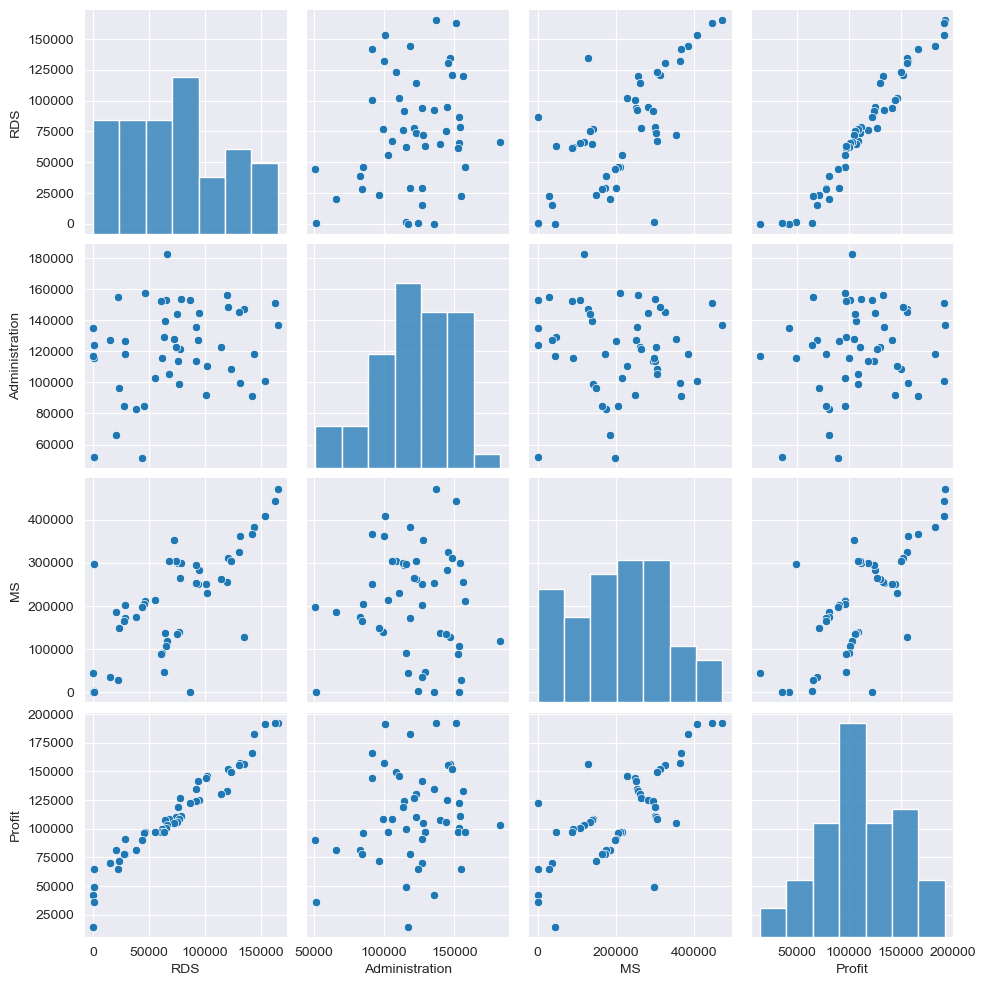

In [24]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

building model

In [25]:
model=smf.ols('Profit~RDS+Administration+MS',data=data).fit()

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 29 May 2023   Prob (F-statistic):           4.53e-30
Time:                        19:14:30   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS                0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS                 0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

here RDS is significant 
Administration and MS are insignificant


# Simple Linear Regression Models


In [32]:
ml_Profit=smf.ols('Profit~Administration',data = data).fit() 
print(ml_Profit.tvalues, '\n', ml_Profit.pvalues) 

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [33]:
ml_Profit=smf.ols('Profit~MS',data = data).fit() 
print(ml_Profit.tvalues, '\n', ml_Profit.pvalues) 

Intercept    7.808356
MS           7.802657
dtype: float64 
 Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64


In [34]:
ml_am=smf.ols('Profit~Administration+MS',data = data).fit() 
print(ml_am.tvalues, '\n', ml_am.pvalues) 

Intercept         1.142741
Administration    2.467779
MS                8.281039
dtype: float64 
 Intercept         2.589341e-01
Administration    1.729198e-02
MS                9.727245e-11
dtype: float64


## Calculating VIF

In [38]:
rsq_RDS=smf.ols('RDS~Administration+MS',data=data).fit().rsquared
vif_rds=1/(1-rsq_RDS)
vif_rds

2.4689030699947017

In [41]:
rsq_admin=smf.ols('Administration~RDS+MS',data=data).fit().rsquared
vif_admin=(1/(1-rsq_admin))
vif_admin

1.1750910070550453

In [43]:
rsq_MS=smf.ols('MS~Administration+RDS',data=data).fit().rsquared
vif_ms=1/(1-rsq_MS)
vif_ms

2.3267732905308773

In [46]:
# Storing vif values in a data frame
d1 = {'Variables':['RDS','Administration','VOL'],'VIF':[vif_rds,vif_admin,vif_ms]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RDS,2.468903
1,Administration,1.175091
2,VOL,2.326773


# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

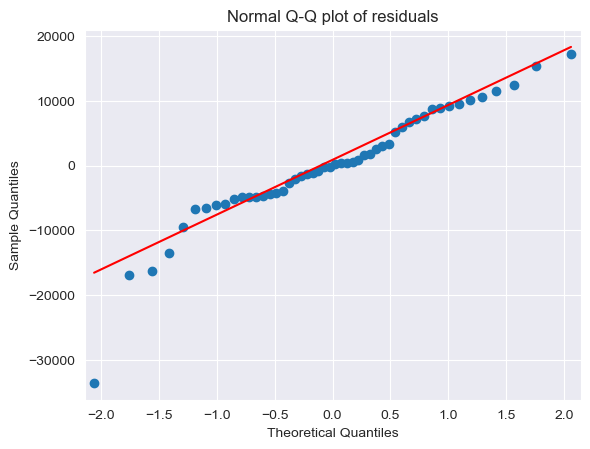

In [47]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [48]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

## Residual Plot for Homoscedasticity

In [49]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

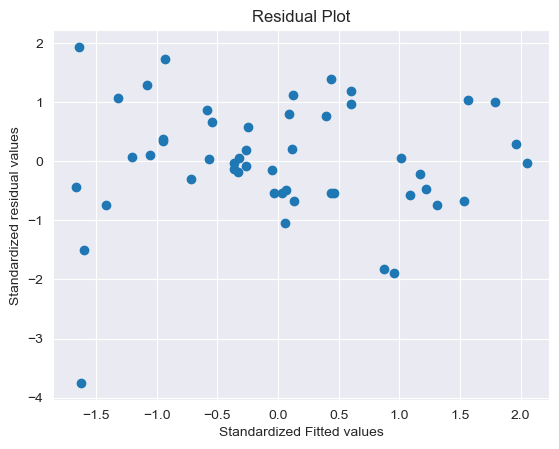

In [50]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

eval_env: 1


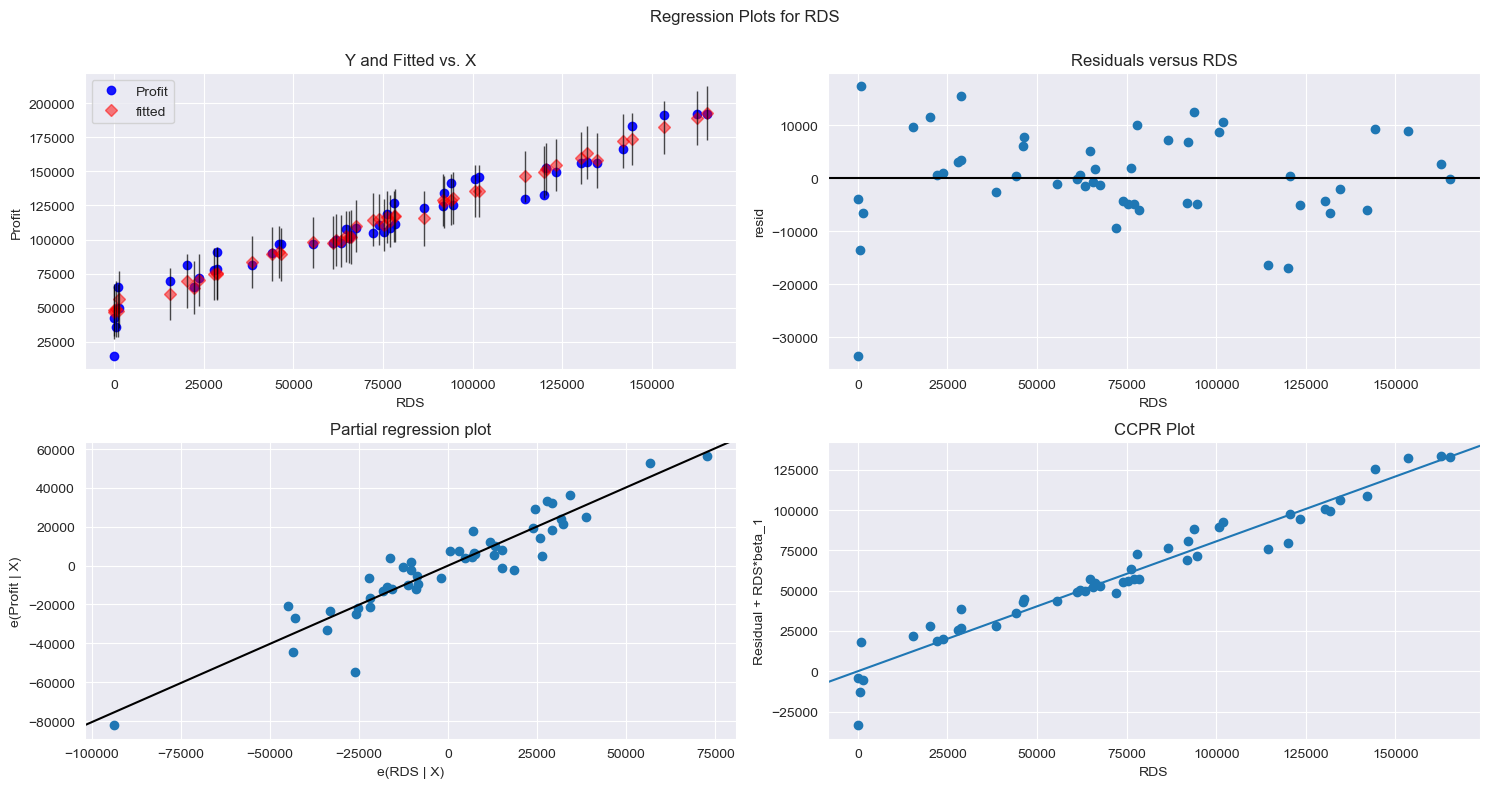

In [51]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDS", fig=fig)
plt.show()


eval_env: 1


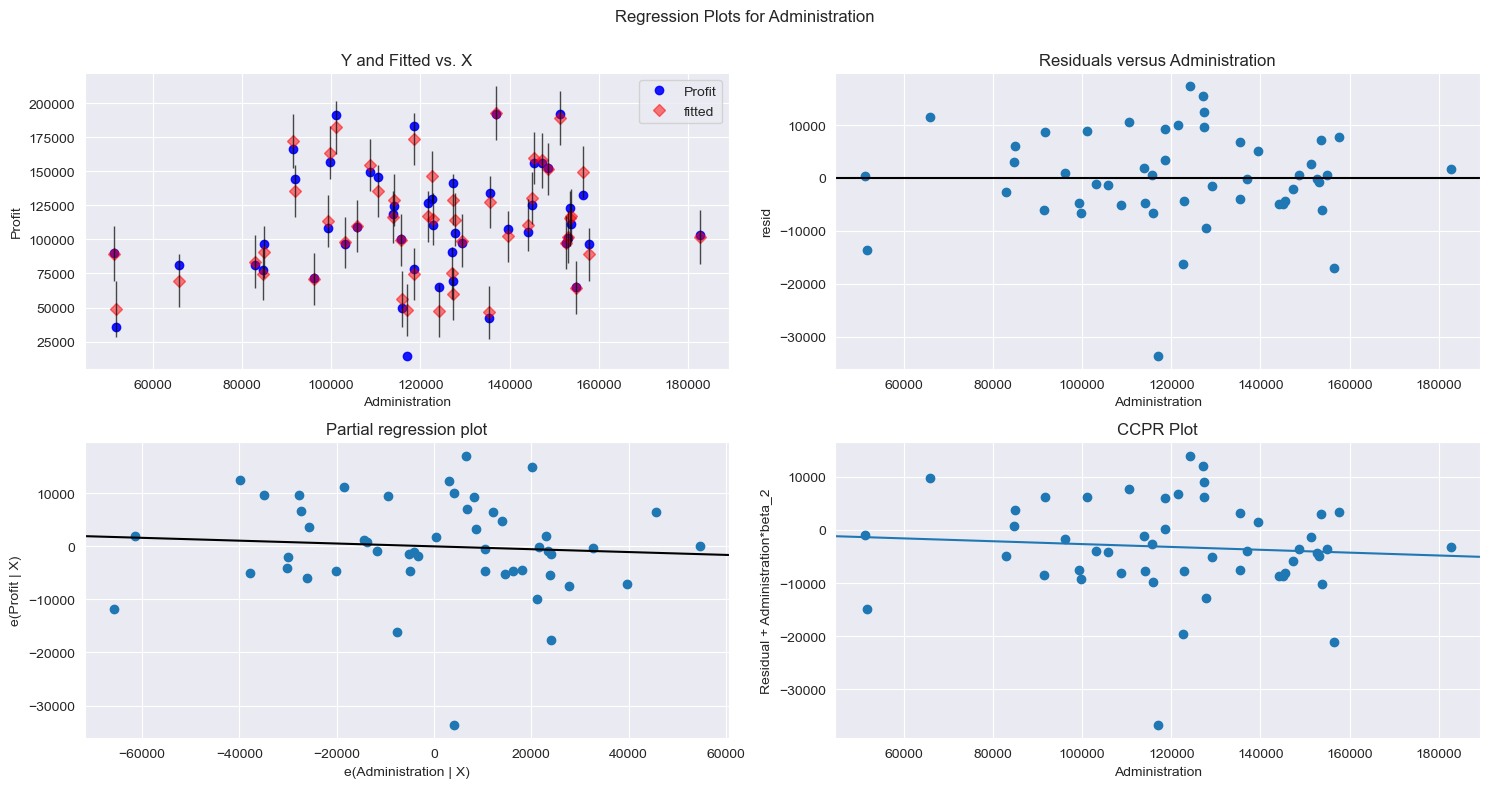

In [52]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

eval_env: 1


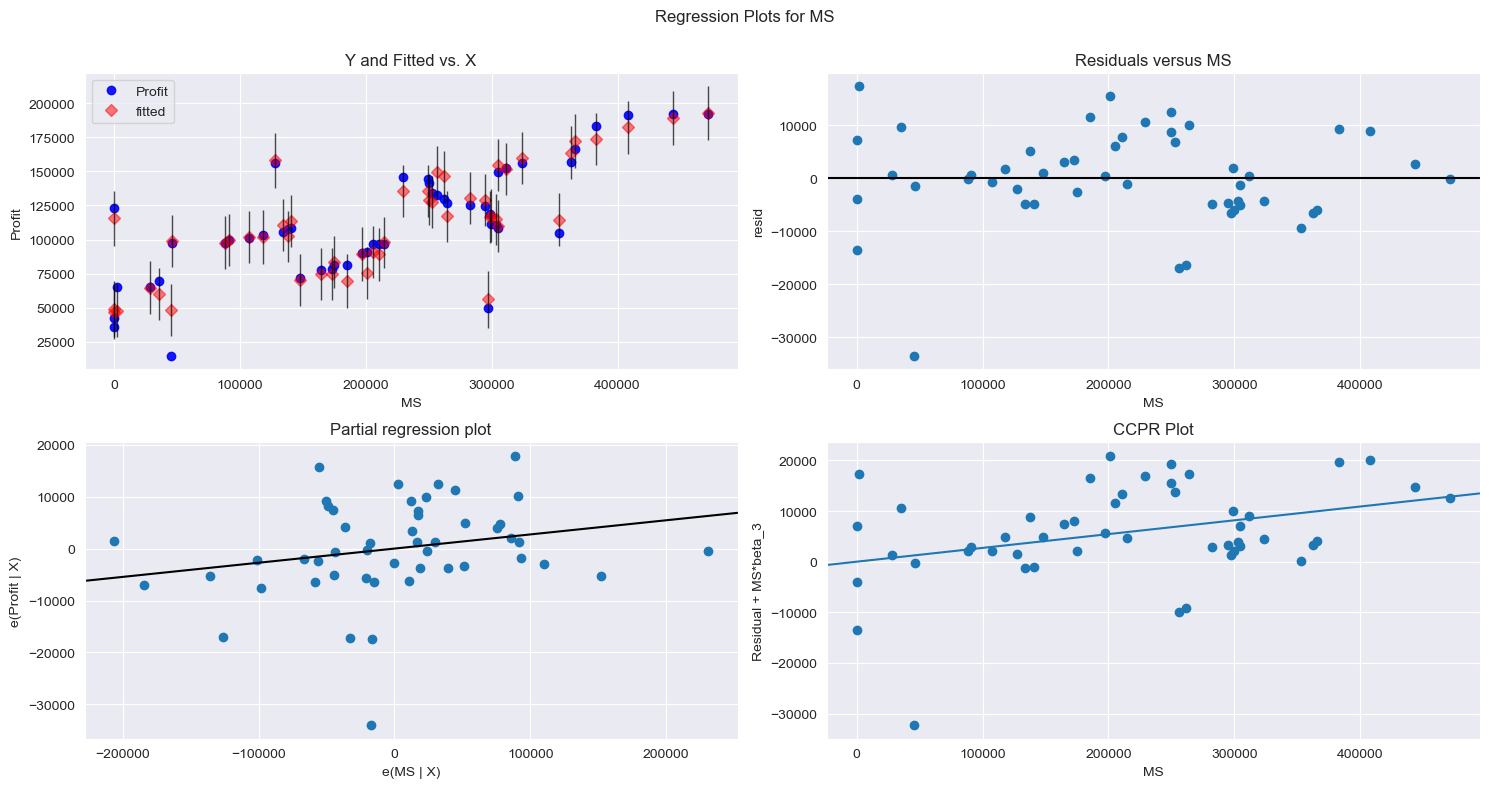

In [53]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MS", fig=fig)
plt.show()

# Model Deletion Diagnostics


## Detecting Influencers/Outliers

## Cook’s Distance

In [54]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

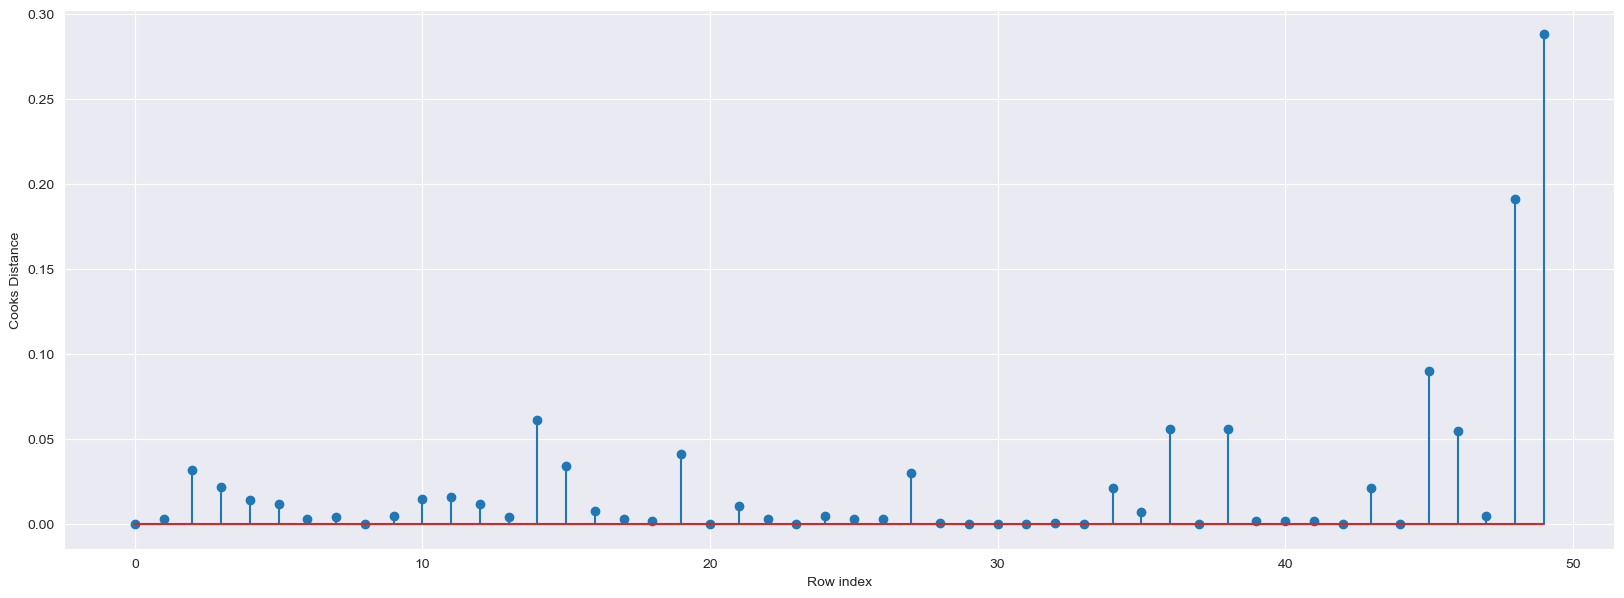

In [55]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [56]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543263)

## High Influence points

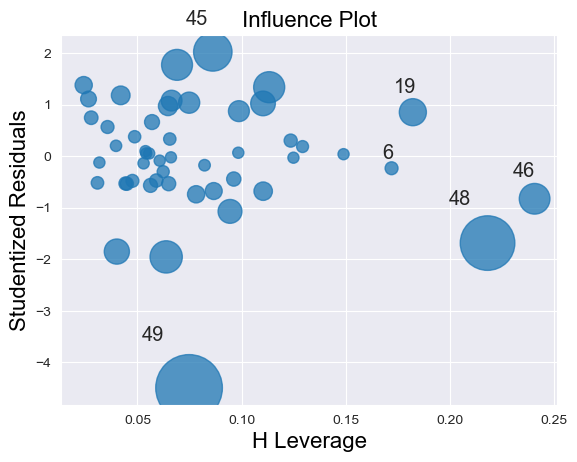

In [57]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [59]:
k = 3 
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff 

0.24

In [61]:
data[data.index.isin([49])]

,RDS,Administration,MS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# Improving the model

In [112]:
data = pd.read_csv("50_Startups.csv")


In [113]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [115]:

data1=data.drop(data.index[[49]],axis=0).reset_index(drop=True)
data1
data1=data1.rename({'R&D Spend':'RDS','Marketing Spend':'MS'},axis=1)
data1


,RDS,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Build Model

In [124]:
final_ml= smf.ols('Profit~RDS+Administration+MS',data = data1).fit() 
final_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 30 May 2023   Prob (F-statistic):           8.85e-32
Time:                        10:19:41   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDS                0.7830      0.038     20.470      0.000       0.706       0.860
Administration    -0.0222      0.043     -0.518      0.607      -0.109       0.064
MS                 0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [125]:
(final_ml.rsquared,final_ml.aic,final_ml.bic)

(0.9613162435129847, 1020.5652974526367, 1028.1325786450793)

In [127]:
model_influence = final_ml.get_influence()
(c, _) = model_influence.cooks_distance

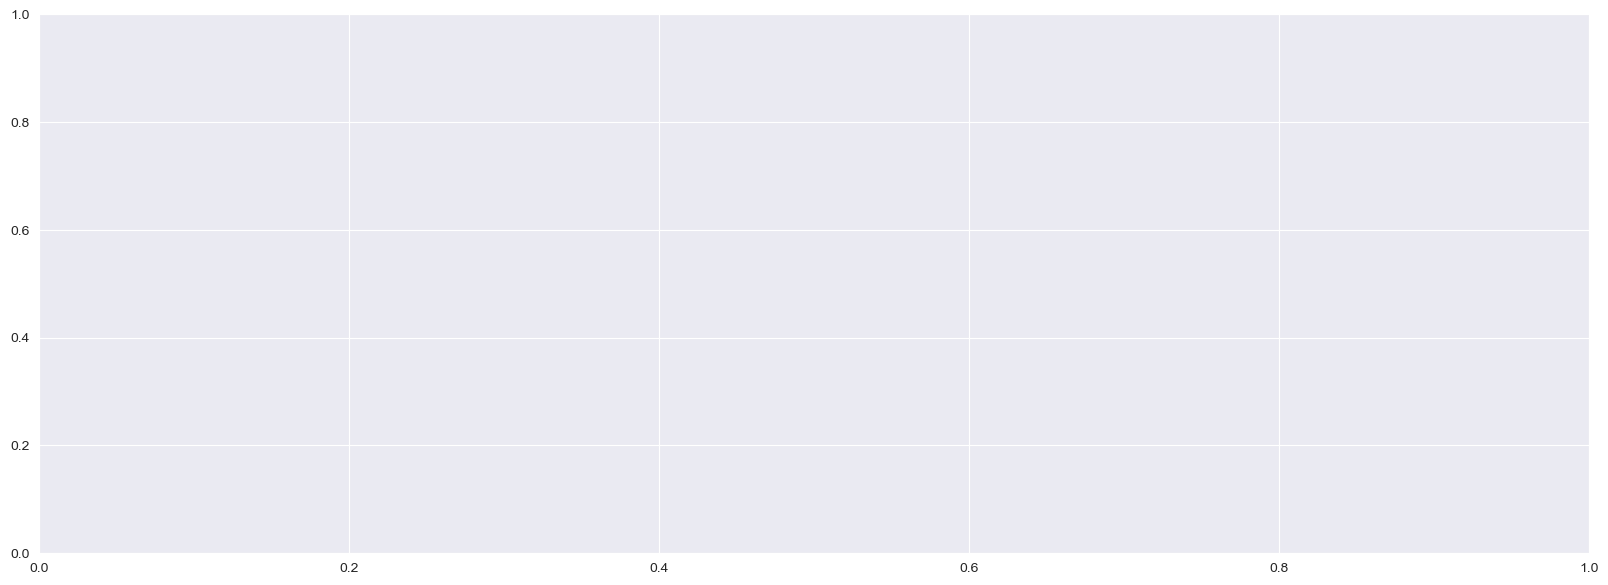

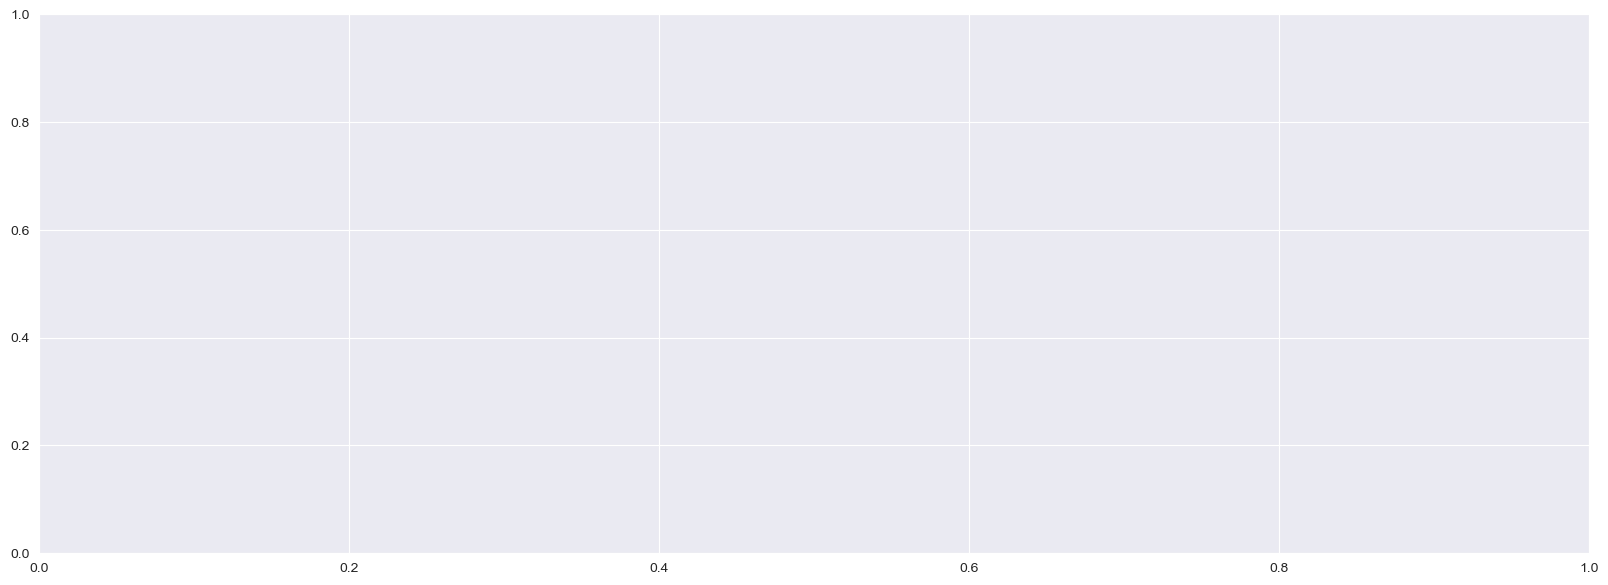

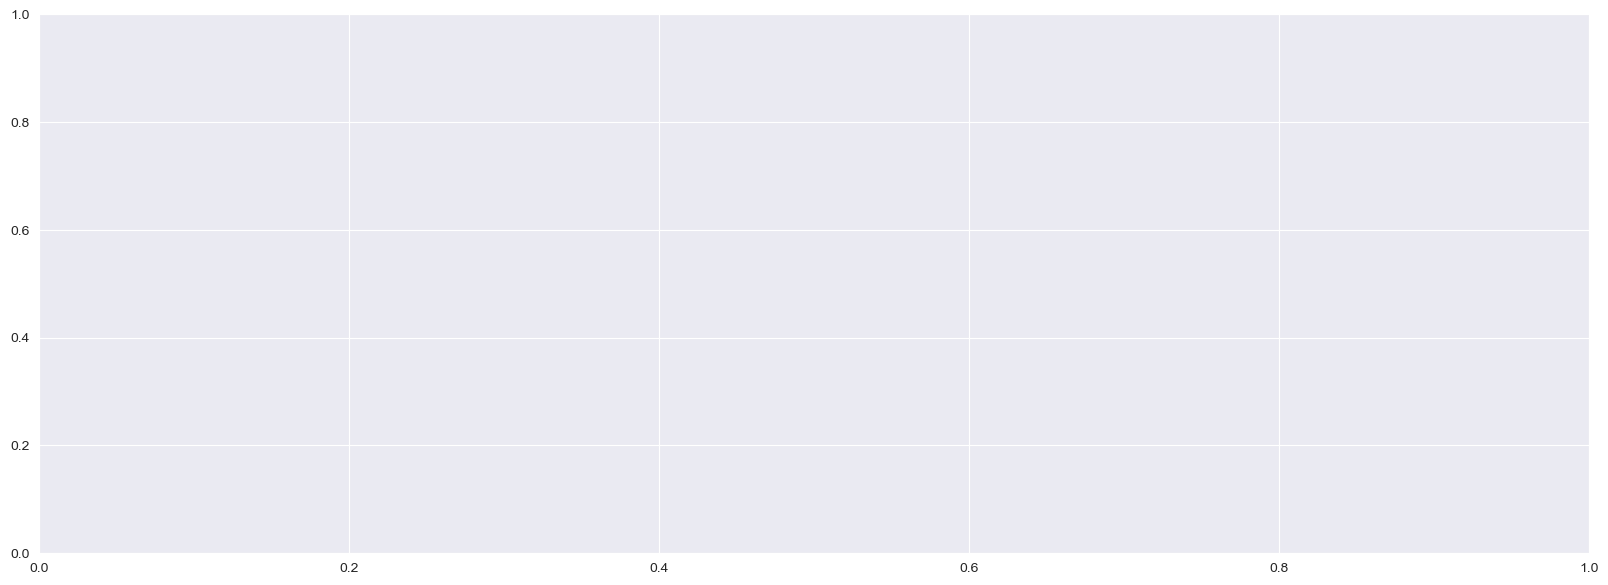

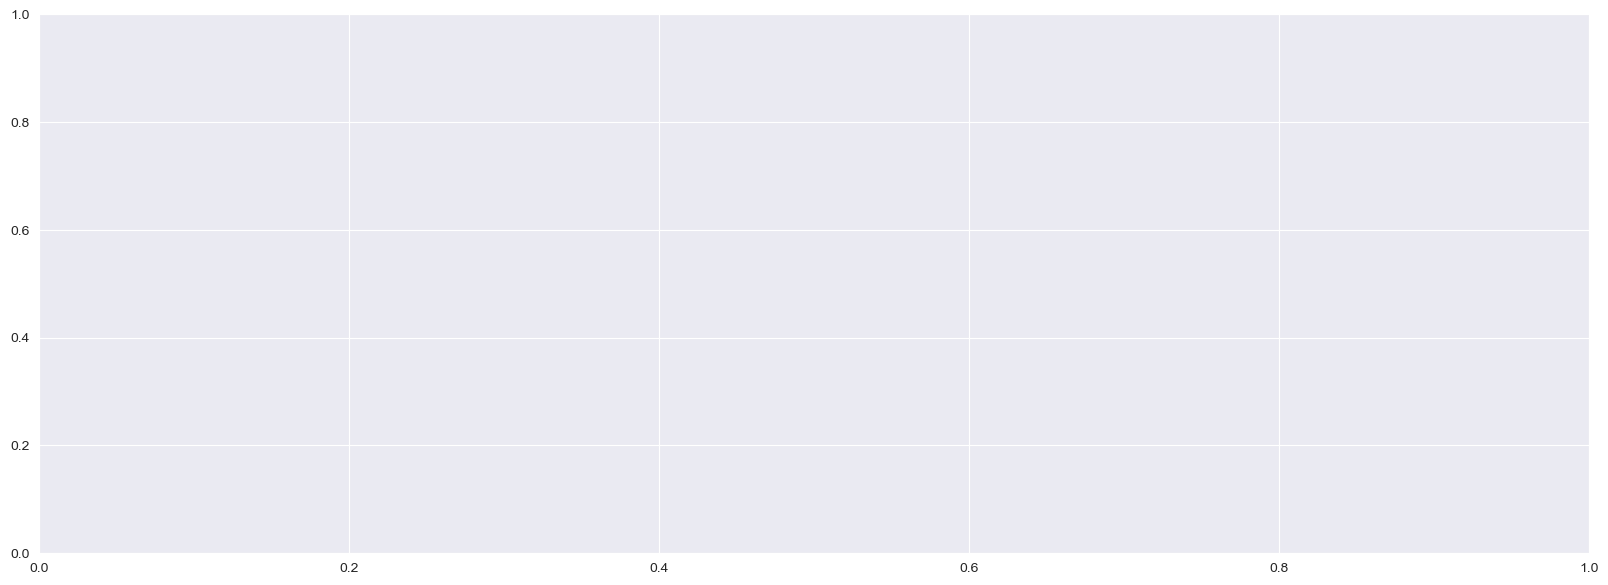

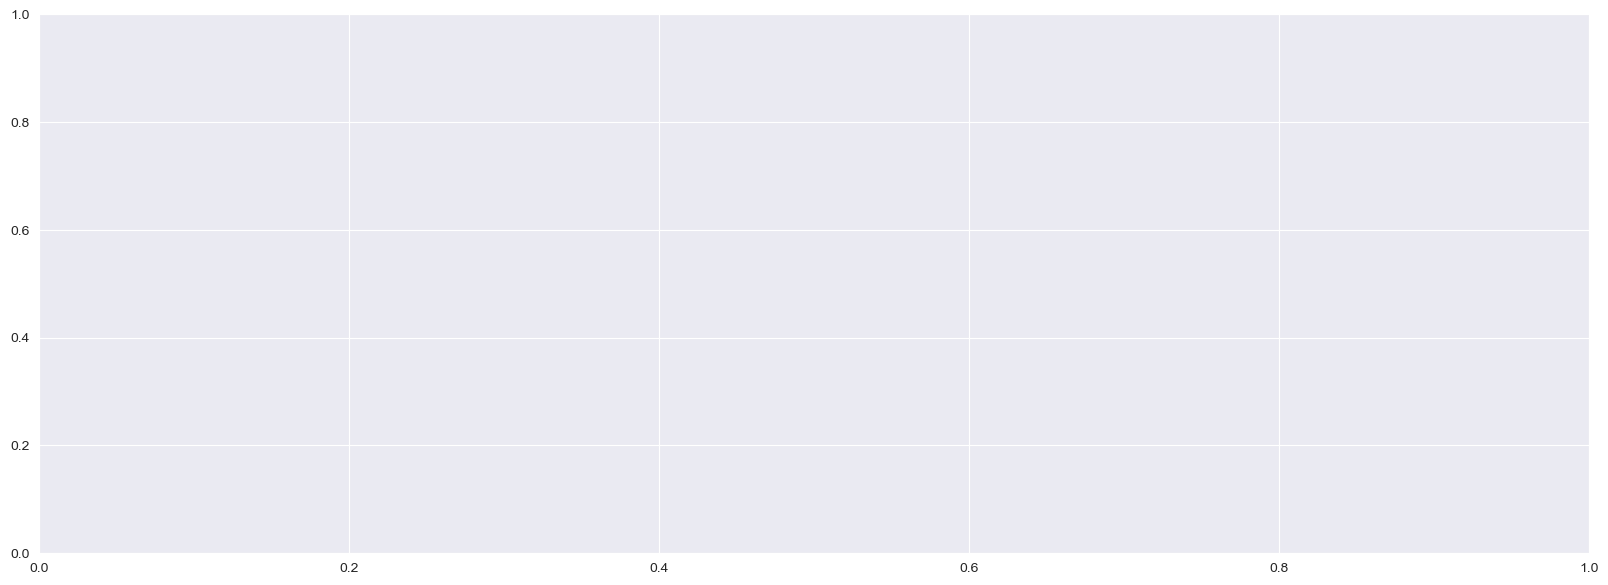

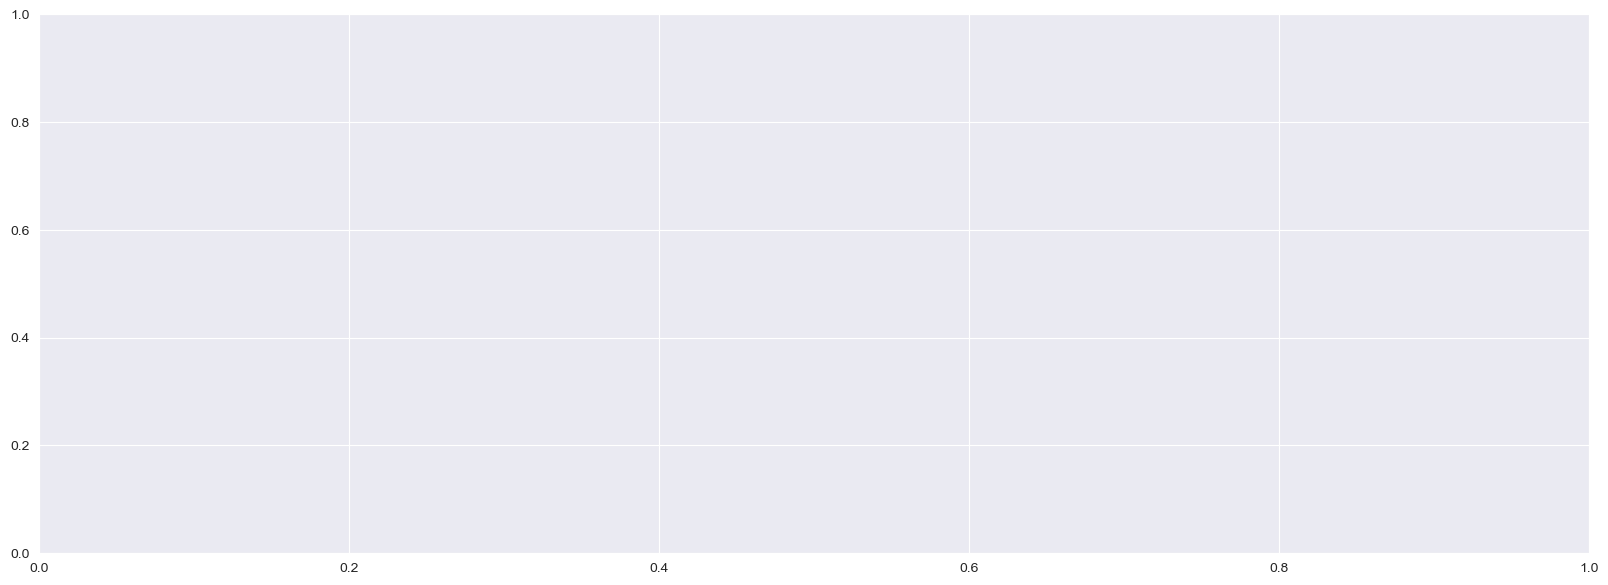

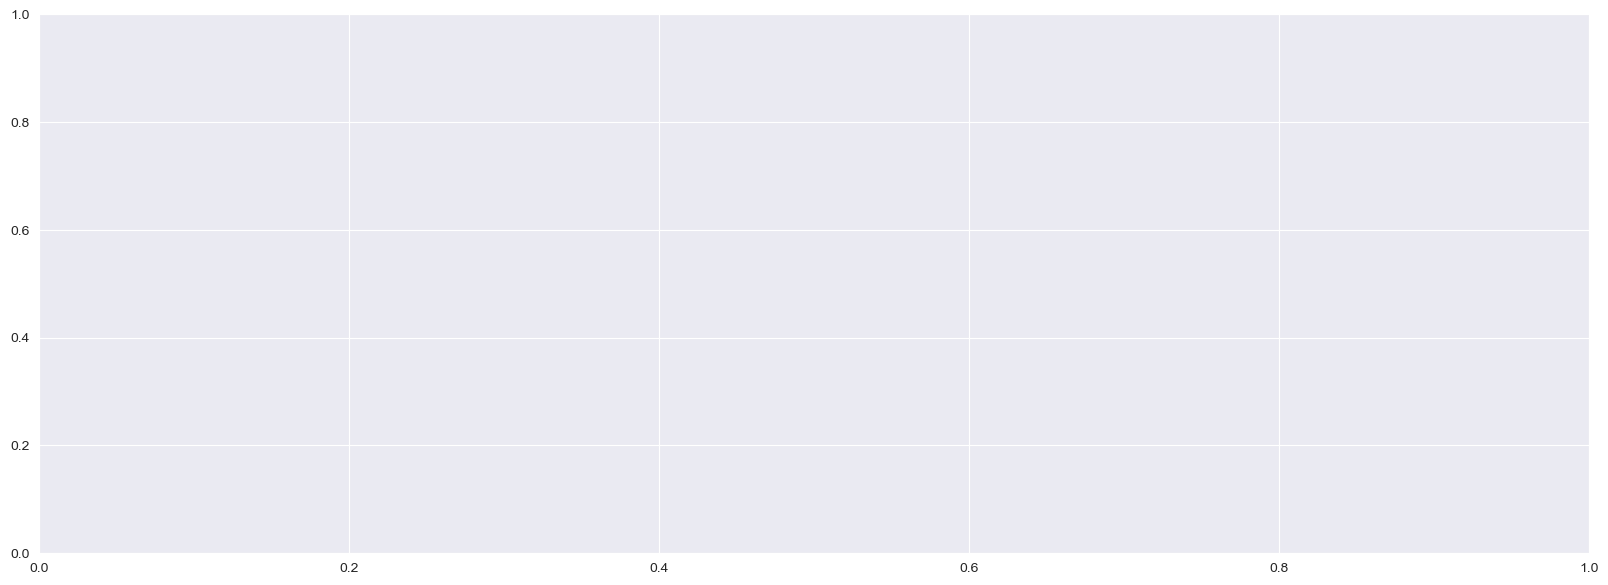

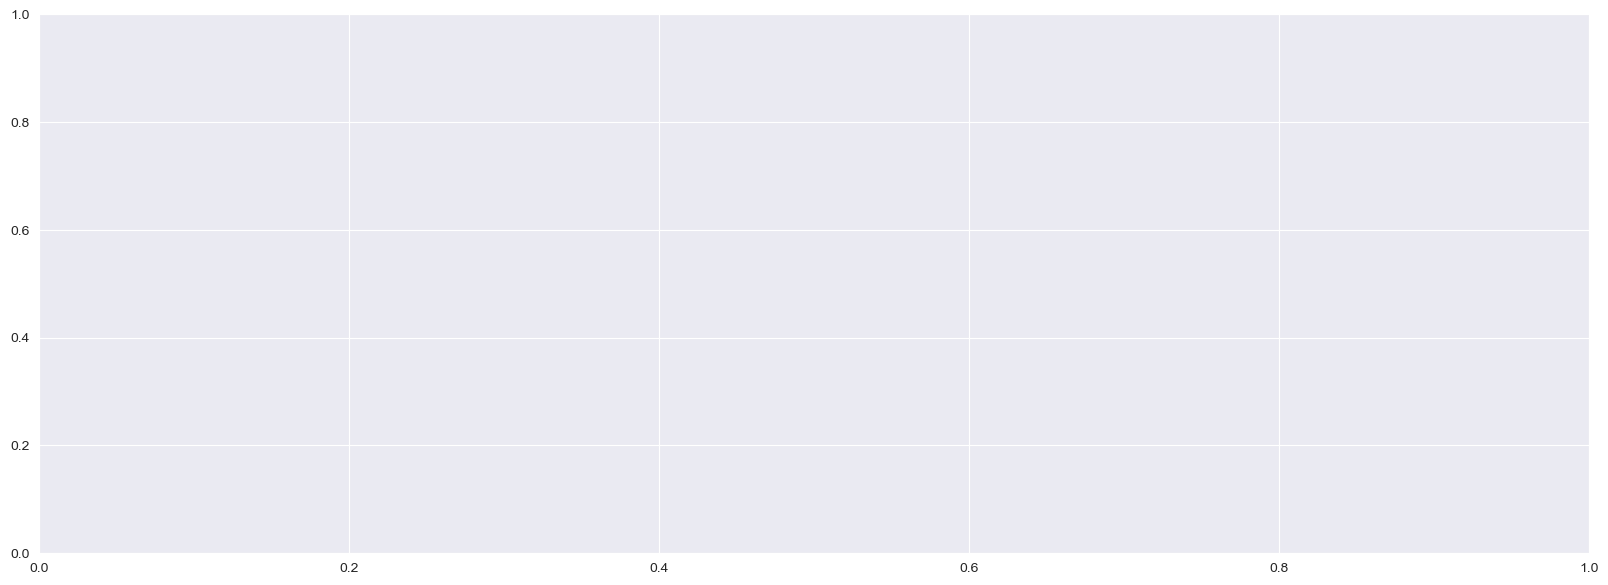

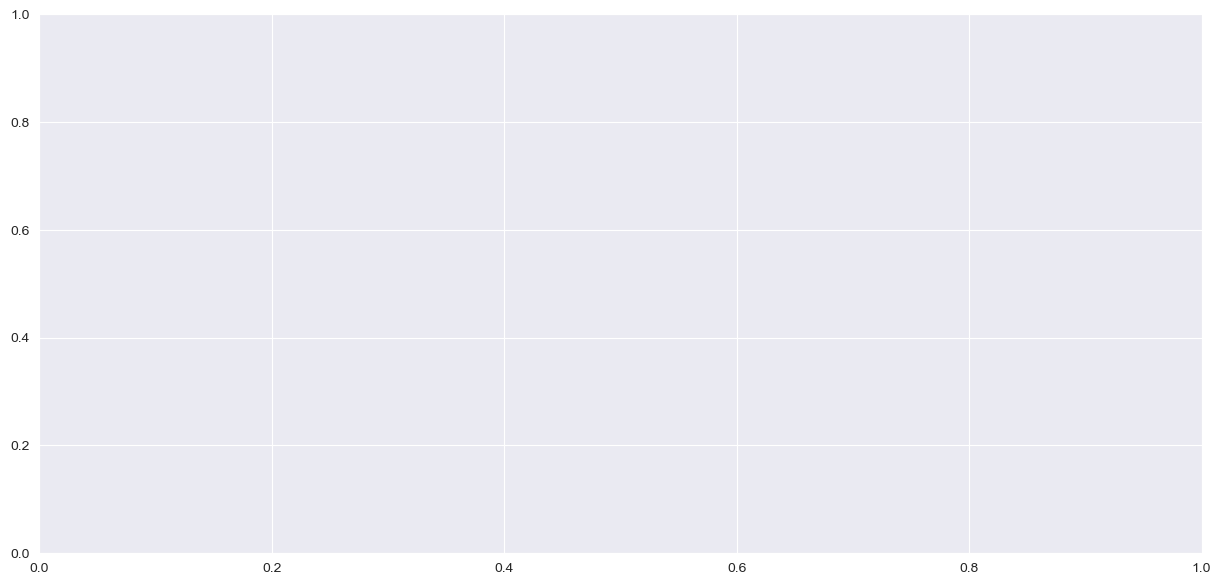

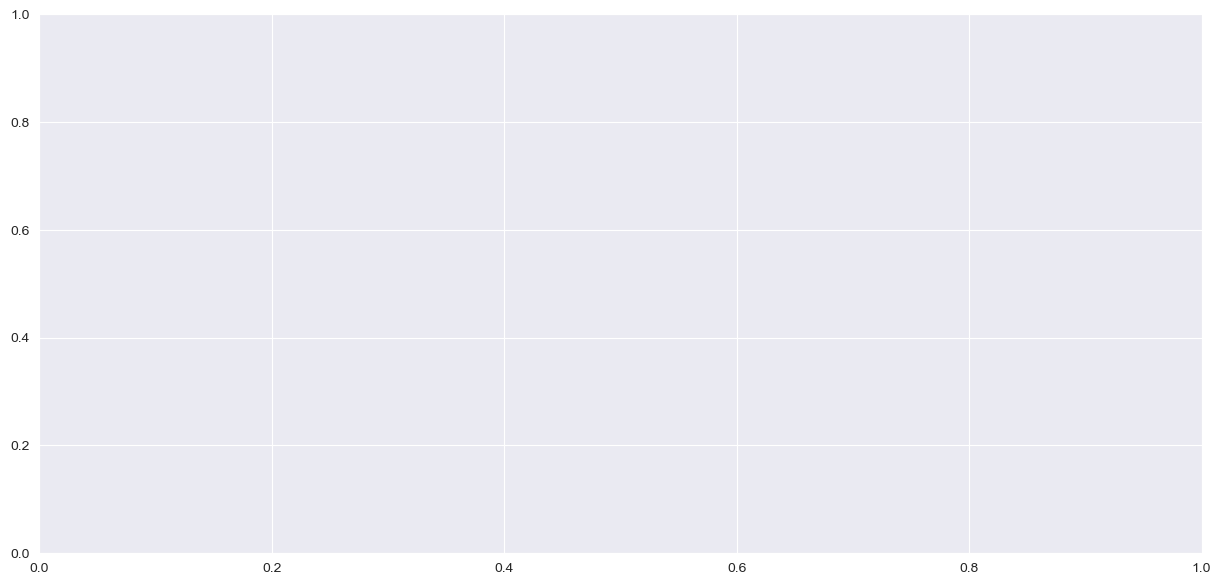

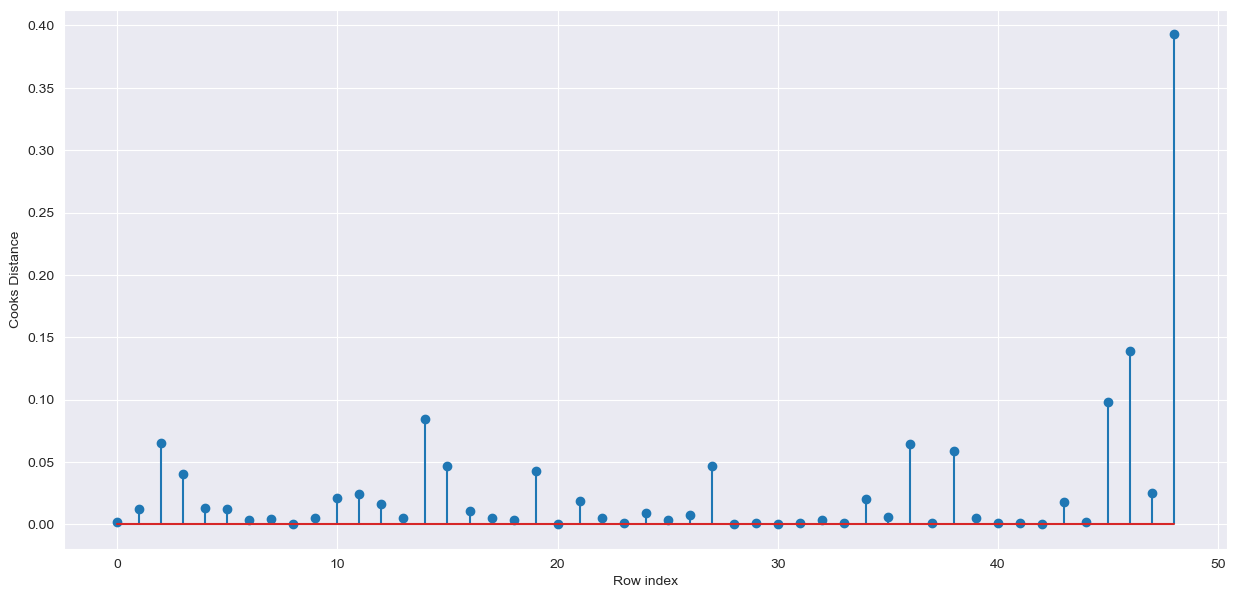

In [128]:
#stem plot
fig = plt.subplots(figsize=(15, 7))
plt.stem(np.arange(len(data1)),np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [129]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(48, 0.39274420556321527)

In [130]:
#Drop 48
data2=data1.drop(data1.index[[48]],axis=0)  
data2.shape 

(48, 5)

In [131]:
data2

,RDS,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [133]:
#Build the model on the new data
final_ml1= smf.ols('Profit~RDS+Administration+MS',data = data2).fit() 

In [134]:
(final_ml1.rsquared,final_ml1.aic,final_ml1.bic)

(0.9626766170294073, 994.6690439260116, 1002.1538479696432)

In [135]:
model_influence = final_ml1.get_influence()
(c, _) = model_influence.cooks_distance

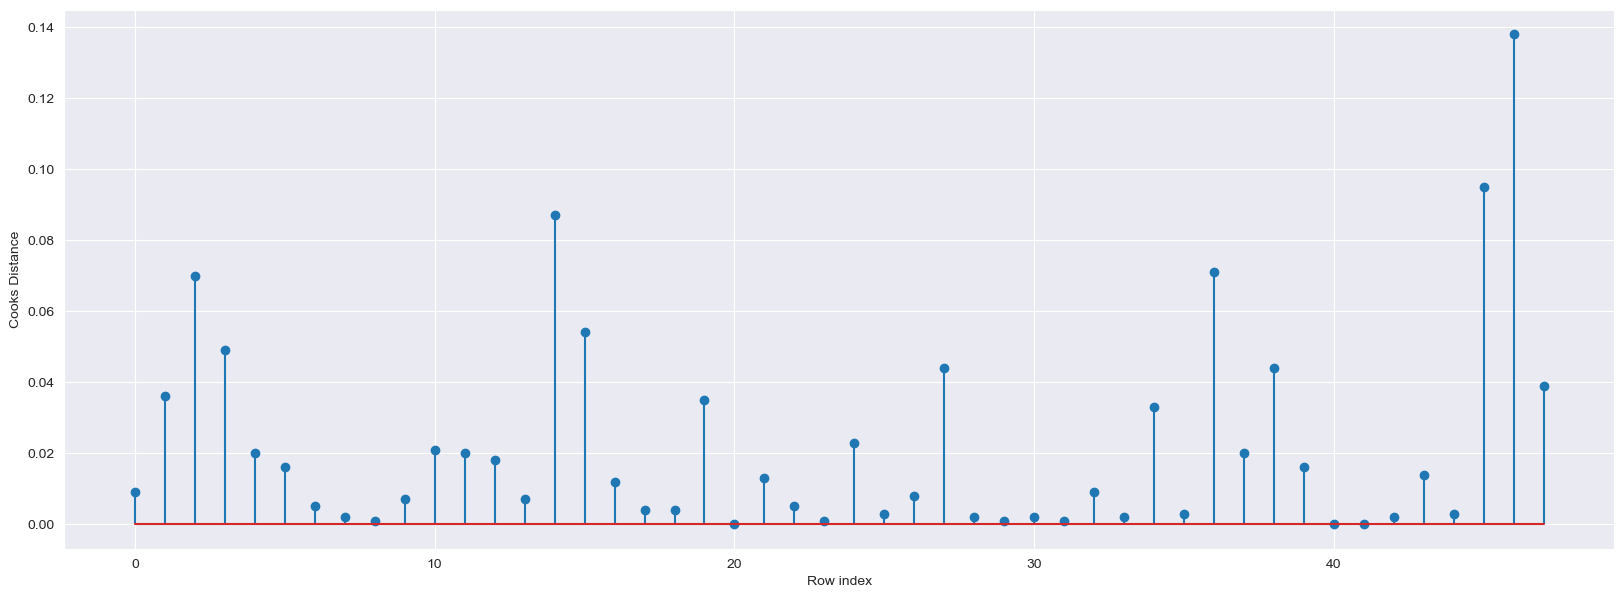

In [136]:
#stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [137]:
#Index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(46, 0.13829133994334708)

In [138]:
#Drop 46
data3=data2.drop(data2.index[[46]],axis=0)  
data3.shape 

(47, 5)

In [139]:
data3

,RDS,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [141]:
data4=data3.reset_index()
data4

,index,RDS,Administration,MS,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [143]:
#Build the model on the new data
final_ml_p= smf.ols('Profit~RDS+Administration+MS',data = data4).fit() 

In [146]:
(final_ml_p.rsquared,final_ml_p.aic,final_ml_p.bic)

(0.9614129113440602, 973.2489443962857, 980.6495348031259)

In [147]:
model_influence = final_ml_p.get_influence()
(c, _) = model_influence.cooks_distance 

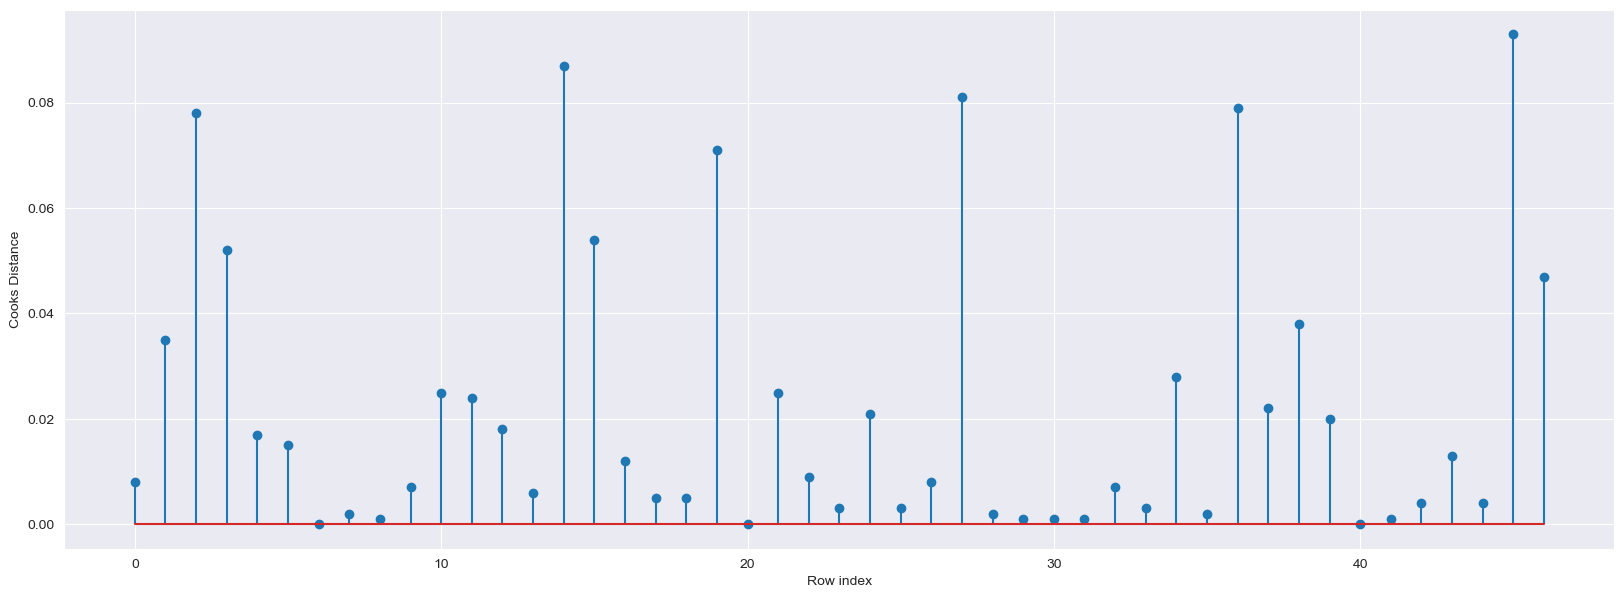

In [148]:
#stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data4)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [149]:
(np.argmax(c),np.max(c)) 

(45, 0.09283373205094037)

# all values are less than 1

In [150]:
final_ml_p.rsquared,final_ml_p.rsquared_adj


(0.9614129113440602, 0.9587207888796923)

In [153]:
new_data=pd.DataFrame({'RDS':90000,"Administration":190000,"M":140000},index=[47])
new_data

,RDS,Administration,MS
47,90000,190000,140000


In [154]:
final_ml_p.predict(new_data)

47    120413.188637
dtype: float64

In [155]:
pred_y=final_ml_p.predict(data4)
pred_y

0     189144.021141
1     185571.505316
2     180343.992254
3     171860.489927
4     171153.336127
5     162804.123770
6     156477.343357
7     158187.870039
8     150255.251593
9     154352.656745
10    135977.904080
11    136546.022058
12    129455.572750
13    127661.509729
14    147998.542616
15    145793.706944
16    118010.693099
17    129938.578129
18    129669.713023
19    116105.658621
20    117938.402714
21    117474.656407
22    115854.360943
23    111858.337361
24    115352.079636
25    103683.989930
26    111491.723852
27    115392.974943
28    101954.513645
29    102912.662101
30    101740.441122
31     99040.236547
32    100968.977775
33    100540.396562
34     90608.105042
35     94025.014882
36     78421.052027
37     94122.405580
38     74828.161109
39     87671.677996
40     78232.195211
41     79164.837264
42     74891.654066
43     64193.943484
44     67653.399768
45     52436.773768
46     51024.934949
dtype: float64

In [156]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_ml_p.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961413
